In [1]:
import sys
sys.path.insert(1, "../")
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [5]:
data = scipy.io.loadmat("../data/v1_laminar.mat")
srate = data["srate"]
csd = data["csd"]
timevec = data["timevec"].T
npnts = csd.shape[1]
ntrials = csd.shape[2]

chan1idx = 0
chan2idx = 6

centFreq = 44
time = np.arange(-1, 1, 1/srate)
s = 10/(2*np.pi*centFreq)
wavelet = np.exp(2*1j*np.pi*centFreq*time) * np.exp(-time**2 / (2*s**2))
halfWavN = len(time) // 2

nWave = len(time)
nData = npnts*ntrials
nConv = nWave + nData - 1

waveletX = scipy.fft.fft(wavelet, nConv)
waveletX = waveletX / np.max(waveletX)

phaseData = np.zeros((2, npnts, ntrials))

dataX = scipy.fft.fft(np.reshape(csd[chan1idx,:,:], (1,-1), order="F"), nConv)
as_ = scipy.fft.ifft(waveletX*dataX, nConv)
as_ = as_[0,halfWavN:-halfWavN+1]
as_ = np.reshape(as_, (npnts, ntrials), order="F")

phaseData[0,:,:] = np.angle(as_)

dataX = scipy.fft.fft(np.reshape(csd[chan2idx,:,:], (1,-1), order="F"), nConv)
as_ = scipy.fft.ifft(waveletX*dataX, nConv)
as_ = as_[0,halfWavN:-halfWavN+1]
as_ = np.reshape(as_, (npnts, ntrials), order="F")

phaseData[1,:,:] = np.angle(as_)

phaseDiffs = np.squeeze(phaseData[0,:,:] - phaseData[1,:,:])

phaseDiffs = np.exp(1j*phaseDiffs)

C:\Users\kerem\AppData\Local\Temp\ipykernel_16400\4211722741.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time = np.arange(-1, 1, 1/srate)


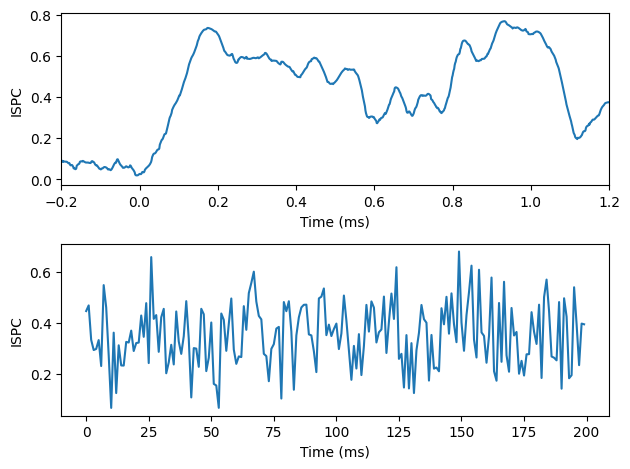

In [6]:
plt.subplot(211)
ispcTrials = abs(np.mean(phaseDiffs,axis=1))
plt.plot(timevec, ispcTrials)
plt.ylabel("ISPC")
plt.xlabel("Time (ms)")
plt.xlim([-.2, 1.2])

plt.subplot(212)
ispcTime = abs(np.mean(phaseDiffs,axis=0))
plt.plot(np.arange(0,ntrials), ispcTime)
plt.ylabel("ISPC")
plt.xlabel("Time (ms)")

plt.tight_layout()